<a href="https://colab.research.google.com/github/Archana7203/Projects/blob/main/Hairfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing necessary libraries

In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle

##Data preprocessing and visualization

In [4]:
df = pd.read_csv("Predict Hair Fall.csv")
df

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,1
995,164777,Yes,Yes,No Data,Accutane,Protein deficiency,Low,47,No,No,No,Yes,0
996,143273,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,1
997,169123,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [6]:
df.describe()

,Id,Age,Hair Loss
count,999.000000,999.000000,999.000000
mean,153354.673674,34.188188,0.497497
std,25516.041985,9.377980,0.500244
min,110003.000000,18.000000,0.000000
25%,131867.500000,26.000000,0.000000
50%,152951.000000,34.000000,0.000000
75%,174969.000000,42.000000,1.000000
max,199949.000000,50.000000,1.000000


In [7]:
df.shape

(999, 13)

In [8]:
df.isnull().sum()

Id                           0
Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64

In [9]:
df.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

In [10]:
df = df.drop(["Id"],axis=1)

In [11]:
df

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
994,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,1
995,Yes,Yes,No Data,Accutane,Protein deficiency,Low,47,No,No,No,Yes,0
996,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,1
997,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,1


In [12]:
for i in range(len(df["Medical Conditions"])):
  if(df["Medical Conditions"][i]=="No Data"):
    df["Medical Conditions"][i] = "No"
  if(df["Medications & Treatments"][i]=="No Data"):
    df["Medications & Treatments"][i]="No"
  if(df["Nutritional Deficiencies "][i]=="No Data"):
    df["Nutritional Deficiencies "][i]="No"

In [13]:
df

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,Yes,No,No,No,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
994,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,1
995,Yes,Yes,No,Accutane,Protein deficiency,Low,47,No,No,No,Yes,0
996,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,1
997,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,1


In [14]:
numeric_features = df.select_dtypes(include=['float', 'int']).columns.tolist()
numeric_features

['Age', 'Hair Loss']

In [15]:
categorical_features = df.select_dtypes(include=['bool','object']).columns.tolist()
categorical_features

['Genetics',
 'Hormonal Changes',
 'Medical Conditions',
 'Medications & Treatments',
 'Nutritional Deficiencies ',
 'Stress',
 'Poor Hair Care Habits ',
 'Environmental Factors',
 'Smoking',
 'Weight Loss ']

In [16]:
for feature in ["Age"]:
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound),df[feature].mean(), df[feature])

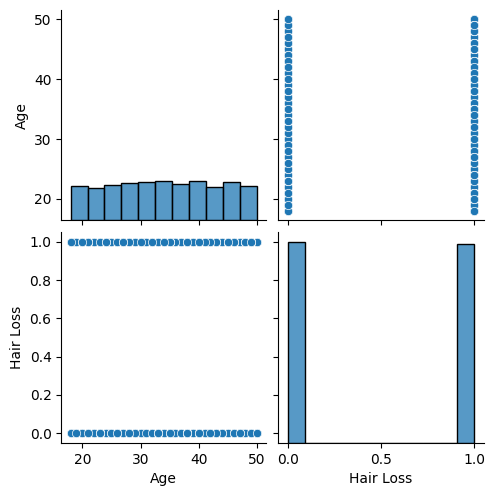

In [17]:
import seaborn as sns
sns.pairplot(df)

In [18]:
Mean = df['Age'].mean()
Std_dev = df['Age'].std()
df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()

In [19]:
for i in categorical_features:
  print(df[i].value_counts())

Yes    522
No     477
Name: Genetics, dtype: int64
Yes    509
No     490
Name: Hormonal Changes, dtype: int64
No                       110
Alopecia Areata          107
Psoriasis                100
Thyroid Problems          99
Androgenetic Alopecia     98
Dermatitis                92
Dermatosis                88
Seborrheic Dermatitis     88
Scalp Infection           79
Eczema                    69
Ringworm                  69
Name: Medical Conditions, dtype: int64
Rogaine                      116
Antidepressants              110
Steroids                     107
Heart Medication             104
Accutane                     102
Antibiotics                   94
Antifungal Cream              94
Chemotherapy                  90
Blood Pressure Medication     90
Immunomodulators              90
No                             2
Name: Medications & Treatments, dtype: int64
Zinc Deficiency         108
Vitamin D Deficiency    104
Biotin Deficiency        99
Vitamin A Deficiency     99
Omega-3 fatt

##Split the data into features and labels. Futher, split them into training and testing data sets

In [20]:
X = df.drop(['Hair Loss'],axis=1) #features
y = df['Hair Loss']#target

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
X_train

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss
761,No,Yes,Psoriasis,Accutane,Vitamin E deficiency,Moderate,-0.020067,Yes,No,Yes,Yes
77,No,Yes,No,Heart Medication,Vitamin E deficiency,High,1.579425,Yes,No,Yes,Yes
813,Yes,Yes,Alopecia Areata,Steroids,No,High,-1.193027,Yes,No,No,Yes
756,Yes,Yes,Scalp Infection,Rogaine,Zinc Deficiency,Moderate,-1.726191,Yes,No,Yes,No
975,Yes,Yes,Dermatitis,Heart Medication,Vitamin D Deficiency,High,1.046261,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
380,Yes,Yes,Ringworm,Immunomodulators,Vitamin E deficiency,High,0.193199,Yes,Yes,Yes,No
905,No,Yes,Thyroid Problems,Rogaine,Vitamin A Deficiency,Moderate,0.513097,Yes,No,No,Yes
733,No,Yes,Thyroid Problems,Steroids,Selenium deficiency,Moderate,0.406464,Yes,Yes,Yes,No
466,Yes,Yes,Ringworm,Chemotherapy,Selenium deficiency,Moderate,1.686057,Yes,No,No,No


##Implement one hot encoding

In [23]:
!pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [24]:
import category_encoders as ce

In [25]:
encoder=ce.OneHotEncoder(cols=categorical_features)
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [26]:
X_train

,Genetics_1,Genetics_2,Hormonal Changes_1,Hormonal Changes_2,Medical Conditions_1,Medical Conditions_2,Medical Conditions_3,Medical Conditions_4,Medical Conditions_5,Medical Conditions_6,...,Stress_3,Age,Poor Hair Care Habits _1,Poor Hair Care Habits _2,Environmental Factors_1,Environmental Factors_2,Smoking_1,Smoking_2,Weight Loss _1,Weight Loss _2
761,1,0,1,0,1,0,0,0,0,0,...,0,-0.020067,1,0,1,0,1,0,1,0
77,1,0,1,0,0,1,0,0,0,0,...,0,1.579425,1,0,1,0,1,0,1,0
813,0,1,1,0,0,0,1,0,0,0,...,0,-1.193027,1,0,1,0,0,1,1,0
756,0,1,1,0,0,0,0,1,0,0,...,0,-1.726191,1,0,1,0,1,0,0,1
975,0,1,1,0,0,0,0,0,1,0,...,0,1.046261,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0,1,1,0,0,0,0,0,0,0,...,0,0.193199,1,0,0,1,1,0,0,1
905,1,0,1,0,0,0,0,0,0,0,...,0,0.513097,1,0,1,0,0,1,1,0
733,1,0,1,0,0,0,0,0,0,0,...,0,0.406464,1,0,0,1,1,0,0,1
466,0,1,1,0,0,0,0,0,0,0,...,0,1.686057,1,0,1,0,0,1,0,1


##Perform training and testing using various classification algorithms

In [27]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [28]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred=model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy score:{0:0.4f}".format(accuracy_score(y_test,y_pred)))

Accuracy score:0.4800


In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [32]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
y_pred=rfc.predict(X_test)

In [34]:
print("Accuracy score:{0:0.4f}".format(accuracy_score(y_test,y_pred)))

Accuracy score:0.4750


In [35]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [36]:
model1.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred = model1.predict(X_test)

In [38]:
print("Accuracy score:{0:0.4f}".format(accuracy_score(y_test,y_pred)))

Accuracy score:0.4600


In [39]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [40]:
gnb.fit(X_train,y_train)

GaussianNB()

In [41]:
y_pred = gnb.predict(X_test)

In [42]:
print("Accuracy score:{0:0.4f}".format(accuracy_score(y_test,y_pred)))

Accuracy score:0.4950


In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

In [44]:
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
print("Accuracy score:{0:0.4f}".format(accuracy_score(y_test,y_pred)))

Accuracy score:0.5050


In [47]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')

In [48]:
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [49]:
y_pred = svm_classifier.predict(X_test)

In [50]:
print("Accuracy score:{0:0.4f}".format(accuracy_score(y_test,y_pred)))

Accuracy score:0.4450


##Hyperparameter tuning

In [51]:
n_estimators = [5,20,50,100]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

In [52]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rfc,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [53]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [54]:
rf_random.best_score_

0.5469496855345912

In [55]:
rf_random.best_params_

{'n_estimators': 5,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False}

In [56]:
final_model = RandomForestClassifier(n_estimators= 5,
 min_samples_split= 10,
 min_samples_leaf= 3,
 max_features='sqrt',
 max_depth= 40,
 bootstrap= False)

In [57]:
final_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=40, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=5)

In [58]:
with open("model.pkl", "wb") as f:
    pickle.dump(final_model, f)

##Predictions on user inputs
Building user interfaces using gradio

In [151]:
def predict(gen, hc,mc,mt,nd,stress,age,poorhair,envf,smoking,w_loss):
  with open("model.pkl", "rb") as f:
      model=pickle.load(f)
  age = (age-Mean)/Std_dev
  predictions = [gen, hc,mc,mt,nd,stress,age,poorhair,envf,smoking,w_loss]
  input_df = pd.DataFrame([predictions], columns=['Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress','Age',
       'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss '])
  encoded_input_data = apply_one_hot_encoding(input_df)
  predictions = model.predict(encoded_input_data)
  predictions = list(predictions)
  if (predictions[0]==0):
    return "absence of baldness"
  elif(predictions[0]==1):
    return "presence of baldness"

In [152]:
def apply_one_hot_encoding(data):
    with open("encoder.pkl", "rb") as f:
      encoder=pickle.load(f)
    encoded_data = encoder.transform(data)
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(data.columns))

    return encoded_df

In [141]:
!pip install gradio

In [149]:
import gradio as gr

In [158]:
outputs=gr.Textbox()

demo = gr.Interface(predict,[gr.Radio(["Yes", "No"], label="Genetics"),
gr.Radio(["Yes", "No"], label="Hormonal Changes"),
gr.Dropdown(["No","Alopecia Areata","Psoriasis","Thyroid Problems","Androgenetic Alopecia",
"Dermatitis","Dermatosis","Seborrheic Dermatitis","Scalp Infection","Eczema","Ringworm"], label="Medical Conditions"),
gr.Dropdown(["Rogaine","Antidepressants","Steroids","Heart Medication","Accutane","Antibiotics",
"Antifungal Cream","Chemotherapy","Blood Pressure Medication","Immunomodulators","No"], label="Medications & Treatments"),
gr.Dropdown(["Zinc Deficiency","Vitamin D Deficiency","Biotin Deficiency","Vitamin A Deficiency","Omega-3 fatty acids","Protein deficiency",
"Magnesium deficiency","Vitamin E deficiency","Selenium deficiency","No","Iron deficiency"],label="Nutritional Deficiencies"),
gr.Radio(["Moderate","Low","High"], label="Stress"),
gr.Number(label="Age"),
gr.Radio(["Yes", "No"], label="Poor Hair Care Habits"),
gr.Radio(["Yes", "No"], label="Environmental Factors"),
gr.Radio(["Yes", "No"], label="Smoking"),
gr.Radio(["Yes", "No"], label="Weight Loss")],
outputs=outputs,
title="Hair Health Predictor",
description="Predicting hair health based on various factors."
)

demo.launch(share="True",debug="True")

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://f8ba81e0dd40704c33.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://f8ba81e0dd40704c33.gradio.live
